# Analyzing "The Office" with NLP!

This project will be analyzing if 'the office' a good and worth watching TV show. The reason i choose 'the office' is merely that it's my favorite show! We will see if the majority of people think the same way as i do.

# Import libraries

If the following modules are not included, remove the "#" and run the next line

In [35]:
# pip install -r requirements.txt 

In [39]:
import pandas as pd
import pickle
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import numpy as np

# from bs4 import BeautifulSoup
# from selenium import webdriver
# import time

Please note that the libraries at the last 3 lines are for webscraping. If you want to find whats going on at the following code, feel free to remove the comment signs by pressing 'CTRL + /' after highlighted the entire chunk of codes, it may take some time to load.

In [17]:

# url = "https://www.imdb.com/title/tt0386676/reviews?ref_=tt_ql_3"
# driver = webdriver.PhantomJS('phantomjs.exe')
# driver.get(url)
# html = driver.page_source.encode('utf-8')
# page_num = 0
# while driver.find_element_by_css_selector("button#load-more-trigger"):
#     try:
#         driver.find_element_by_id("load-more-trigger").click()
#         page_num += 1
#         print("getting page number "+str(page_num))
#         time.sleep(1)
#     except:
#         break

# html = driver.page_source.encode('utf-8')
# soup=BeautifulSoup(html,'html.parser')
# container=soup.findAll('div',{'class':'text show-more__control'})
# review_df=pd.DataFrame(columns=['review'])
# for x in container:
#     review_df=review_df.append(pd.Series(x.text,index=['review']),ignore_index=True)


# Data Cleaning

We are going to clean the data using spacy. First we need to pickle the object as store it to review_df as a DataFrame. This DataFrame consists of 1053 of user reviews from imbd 

In [34]:
input_file = open('review.dat', 'rb')
review_df=pickle.load(input_file)
review_df.head()

,review
0,"I'm going to go straight to the point, and say..."
1,For the past several months since I dropped my...
2,"I'm from Scotland and loved the British ""Offic..."
3,Wow...I know I am probably quite late to this ...
4,I can not believe Michael Scott can survive mo...


Now, the following codes take every single review and does the following:

- lemmatize ( group all the words with the same meaning and convert them into lemma terms. e.g. work,working,worked --> work)
- remove any punctuations (punctuations serve no purpose because it has no meaning, and we can't obtain useful information from it)
- remove any stopwords (stopwords are 'the','and','I','an',...., these words are not useful as well in term of analyzing text)

In [30]:
# !python -m spacy download en_core_web_sm

If the following code does not work for you, try to run the code above after removing the "#" sign

In [28]:
nlp = spacy.load("en_core_web_sm")
for x in range(len(review_df)):
    doc = nlp(review_df['review'][x])
    s = ' '.join([token.lemma_ for token in doc if not token.is_punct | token.is_space |token.is_stop])
    review_df['review'][x]=s

Since it takes quite some time to run the code, we are going to save(pickle) the object into a file.

In [ ]:
output_file = open('review_corpus.dat', 'wb')
pickle.dump(review_df,output_file)

# Generating Word Cloud

We've cleaned our data, now we can do some exploratory analysis on the reviews. The common approach is to generate a word cloud and see what words are showing more frequently than others.

Text(0.5, 1.0, 'The office Review')

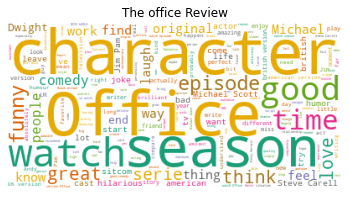

In [16]:
input_file = open('review_corpus.dat', 'rb')
review_corpus=pickle.load(input_file)

wc=WordCloud(background_color='white',colormap='Dark2',max_font_size=150,random_state=42)
s=''
for x in range(len(review_df)):
    s+=review_corpus['review'][x]

wc.generate(s)
plt.imshow(wc)
plt.axis('off')
plt.title('The office Review')

We see some useful words like character which leads us to think that each character is well potrayed in the show.Also, there are 'good','funny','great','love', 'comedy' showing that it's not a bad show in general.

# Sentiment Analysis

Sentiment Analysis evaluate each review and give them a polarity score (how positive is this statement) ranged from -1 and 1 subjectivity score (how opinionated it is) ranged from 0 and 1. 

*textblob takes and gives each word a polarity and subjectivity score, and average them for each review. e.g "good" may have a polarity score of 0.8 and subjectivity score of 0.7

In [37]:
pol=lambda x:TextBlob(x).sentiment.polarity 
sub=lambda x:TextBlob(x).sentiment.subjectivity
review_corpus['polarity']=review_corpus['review'].apply(pol)
review_corpus['subjectivity']=review_corpus['review'].apply(sub)
review_corpus.head()

,review,polarity,subjectivity
0,straight point hilarious ve Michael idiocy Jim...,0.425000,0.645833
1,past month drop cable company pick Netflix ve ...,0.158081,0.576010
2,Scotland love british Office adore american ve...,0.125000,0.653125
3,wow know probably late WOW bravo wonderfully w...,0.303341,0.617742
4,believe Michael Scott survive modern society.h...,0.283333,0.475000


In [48]:
print(f'The avearge polarity score is {np.average(review_corpus["polarity"])}')
print(f'The avearge subjectivity score is {np.average(review_corpus["subjectivity"])}')

The avearge polarity score is 0.22441668998269707
The avearge subjectivity score is 0.590514663519231


The polarity score is 0.2244 which is not a bad score, and it shows that people are pretty positive about the show.

# Top 5 best reviews and worst reviews

In [56]:
bad5=review_corpus.sort_values(by='polarity')[:5].index
good5=review_corpus.sort_values(by='polarity',ascending=False)[:5].index
bad_reviews=review_df.iloc[bad5]['review']
good_reviews=review_df.iloc[good5]['review']

In [57]:
print('Good Reviews\n')
for i,x in enumerate(good_reviews):
    print(f'Review #{i+1}: {x}')
    print('\n')

Good Reviews

Review #1: I watched full seasons 4 or 5 times (probably 5) and I'm still tho'. Guys every actors/actresses in here is just perfectly matched. I recommend it everyone !!!!


Review #2: It's just perfect nothing else to say!!!!!!!!!!!!!!!


Review #3: I feel like every character is a dear person to me. <3


Review #4: WORLD BEST BOSS EVER WORLD BEST BOSS EVER WORLD BEST BOSS EVER WORLD BEST BOSS EVER
WORLD BEST BOSS EVER WORLD BEST BOSS EVER
WORLD BEST BOSS EVER WORLD BEST BOSS EVER WORLD BEST BOSS EVER WORLD BEST BOSS EVER
WORLD BEST BOSS EVER WORLD BEST BOSS EVER
WORLD BEST BOSS EVER WORLD BEST BOSS EVER WORLD BEST BOSS EVER WORLD BEST BOSS EVER
WORLD BEST BOSS EVER WORLD BEST BOSS EVER
WORLD BEST BOSS EVER WORLD BEST BOSS EVER WORLD BEST BOSS EVER WORLD BEST BOSS EVER
WORLD BEST BOSS EVER WORLD BEST BOSS EVER
WORLD BEST BOSS EVER WORLD BEST BOSS EVER WORLD BEST BOSS EVER WORLD BEST BOSS EVER
WORLD BEST BOSS EVER WORLD BEST BOSS EVER


Review #5: WORLD BEST BOSS EVER WOR

In [59]:
print('Bad Reviews\n')
for i,x in enumerate(bad_reviews):
    print(f'Review #{i+1}: {x}')
    print('\n')

Bad Reviews

Review #1: I'm watching the office for the first time, and I decided to make an account here just to say how boring Jim and Pam is and I miss Michael Scott, and I see this as the Pam And Jim show. O my god I can't watch them anymore!!!! I'm only still watching to see what Dwight Schrute is up to


Review #2: To be put to sleep with the most boring content imaginable.... Then this piece of crap show is for you!! KaaKaAa!!!!!


Review #3: Seasons 7 to 9 are indescribable trash but that's not all of it it. Have you seen its fans? Have you seen those redditor morons who like this show? This is insane how degenarate the redditor fans of this show are.


Review #4: I hate the Indian actress who plays Kelly. I want to punch the TV when I see or hear her.


Review #5: This show is the worst ever in the history of television


